# PROJETO I 
## Processamento Digital de Imagens


### Questão 1: 
Conversão RGB-YIQ-RGB.


In [1]:
import colorsys
# !pip install opencv-python
import cv2 as cv
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
import numpy as np

In [2]:
# Vetores a serem utilizados
coresRGB_antes = []
coresYIQ = []
coresRGB_depois =[]

Imagem base escolhida: 


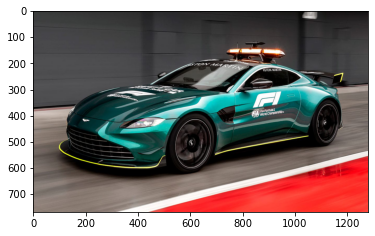

In [3]:
# Imagem escolhida
image = Image.open("./imagens_teste/aston-vantage-safety-car.jpg")
# image = Image.open("./imagens_teste/velho.jpg")

imshow(image)
print("Imagem base escolhida: ")

In [4]:
def matriz_RGB(image, coresRGB):
    linha = []
    count = 0
    for cor_rgb in image.getdata():   #Pega o valor RGB de cada pixel
        linha.append(cor_rgb)
        if(count == image.size[0] - 1):
            coresRGB.append(linha)
            count = -1
            linha = []
        count += 1
    return coresRGB

In [5]:
matriz_RGB(image, coresRGB_antes)

print()

In [6]:
#Função que converte RBG para YIQ
def RGB2YIQ (r,  g, b):
    y = 0.299*r + 0.587*g + 0.114*b
    i = 0.596*r - 0.274*g - 0.322*b
    q = 0.211*r - 0.523*g + 0.312*b
    return (round(y,2), round(i,2), round(q,2))

In [7]:
#Função que converte YIQ para RGB
def YIQ2RGB (y,  i, q):
    r = 1.0*y + 0.956*i + 0.621*q
    g = 1.0*y - 0.272*i - 0.647*q
    b = 1.0*y - 1.106*i + 1.703*q
    return (round(r,2),  round(g,2), round(b,2))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Imagem convertida do RGB - YIQ


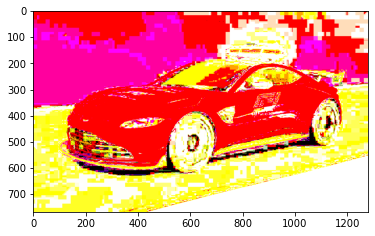

In [8]:
for linha in coresRGB_antes:   #transformando em YIQ
    vetor = []
    for rgb in linha:
        r = rgb[0]
        g = rgb[1]
        b = rgb[2]
        y, i, q = RGB2YIQ(r, g, b)
        vetor.append((y,i,q))
        
    coresYIQ.append(vetor)
    
imshow(coresYIQ)
print("Imagem convertida do RGB - YIQ")

In [9]:
def RGBRound(r, g, b):
    if r < 0.0:
        r = 0.0
    if g < 0.0:
        g = 0.0
    if b < 0.0:
        b = 0.0
    if r > 255:
        r = 255
    if g > 255:
        g = 255
    if b > 255:
        b = 255

    return (r, g, b)

Imagem convertida do YIQ de volta para RGB


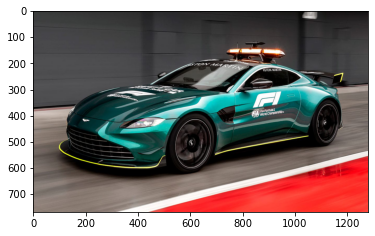

In [10]:
#transformando de volta para RGB
for linha in coresYIQ:    
    vetor = []
    for yiq in linha:
        y = yiq[0]
        i = yiq[1]
        q = yiq[2]
        
        r, g, b = YIQ2RGB(y, i, q)
        r, g, b = RGBRound(r, g, b)
        r, g, b = int(round(r)), int(round(g)), int(round(b))
        
        yiq2 = (r,g,b)
        vetor.append(yiq2)
    coresRGB_depois.append(vetor)
    
imshow(coresRGB_depois) 
print("Imagem convertida do YIQ de volta para RGB")

In [11]:
#verificando se as imagens são iguais
def verifica_imagens(antes, depois):
    if antes == depois:     
        print('Imagens convertidas com sucesso')
    else:
        print('Imagens diferentes')

In [12]:
verifica_imagens(coresRGB_antes, coresRGB_depois)

Imagens convertidas com sucesso


### Questão 2
Negativo. Duas formas de aplicação devem ser testadas: em RGB (banda a banda) e na banda Y, com posterior conversão para RGB.

Imagem original


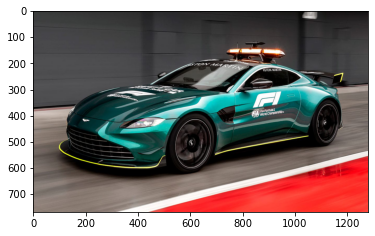

In [13]:
image_2 = []
matriz_RGB(image, image_2)

imshow(image)
print("Imagem original")

In [14]:
def RGB_negativo(image_2):
    coresNegativo = []
    for linha in image_2:    #passando para negativo
        vetor = []
        for rgb in linha:
            r = 255 - rgb[0]
            g = 255 - rgb[1]
            b = 255 - rgb[2]
            rgb2 = (r,g,b)
            vetor.append(rgb2)
        coresNegativo.append(vetor)
    return coresNegativo

Imagem RGB negativa:


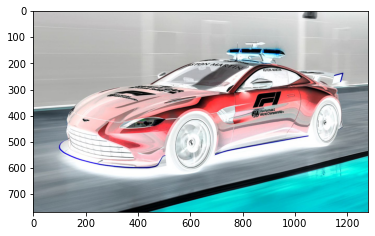

In [15]:
imagem_negativa = RGB_negativo(image_2)  

imshow(imagem_negativa)
print("Imagem RGB negativa:")

In [16]:
#Conversão na banda Y
def conversor_banda_y (r,  g, b):
    y = 0.30*r + 0.59*g + 0.11*b
    i = 0.74*(r-y) - 0.27*(b-y)
    q = 0.48*(r-y) + 0.41*(b-y)
    return (y, i, q)

In [17]:
def conversor_rgb_banda_y(image):
    coresYIQ = []

    #transformando em YIQ
    for linha in image:   
        vetor = []
        for rgb in linha:
            r = rgb[0]
            g = rgb[1]
            b = rgb[2]
            y, i, q = conversor_banda_y(r, g, b)

            vetor.append((y,i,q))
        coresYIQ.append(vetor)
        
    return coresYIQ
    
    

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Imagem convertida do RGB - banda Y


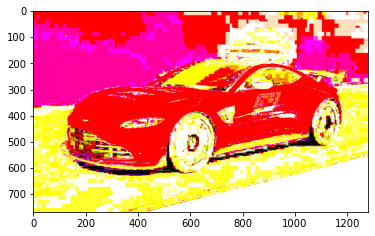

In [18]:
coresYIQ_banda_y = conversor_rgb_banda_y(image_2)

imshow(coresYIQ_banda_y)
print("Imagem convertida do RGB - banda Y")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Imagem convertida da banda Y para negativo


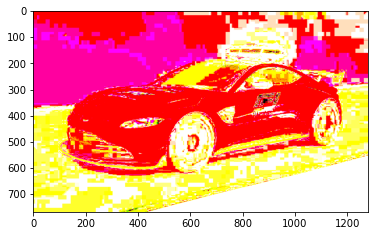

In [19]:
coresNegYIQ = []

# Transformando em negativo
for linha in coresYIQ_banda_y:    
    vetor = []
    for yiq in linha:
        y = 255 - yiq[0] 
        yiq2 = (y,yiq[1],yiq[2])
        vetor.append(yiq2)
    coresNegYIQ.append(vetor)
    
imshow(coresNegYIQ) 
print("Imagem convertida da banda Y para negativo")

In [20]:
verifica_imagens(coresYIQ_banda_y, coresNegYIQ) 

Imagens diferentes


In [21]:
#Conversor banda Y
def banda_y_rgb (y, i, q):
    r = y + 0.9468822170900693*i + 0.6235565819861433*q
    g = y - 0.27478764629897834*i - 0.6356910791873801*q
    b = y - 1.1085450346420322*i + 1.7090069284064666*q
    
    return (r, g, b)

In [22]:
def conversor_banda_y_rgb(coresYIQ):
    coresRGB=[]
    
    for linha in coresNegYIQ:    #transformando de volta para RGB
        vetor = []
        for yiq in linha:
            y = yiq[0]
            i = yiq[1]
            q = yiq[2]

            r, g, b = banda_y_rgb(y, i, q)
            r, g, b = RGBRound(r, g, b)
            r, g, b = int(round(r)),int(round(g)), int(round(b))

            yiq2 = (r,g,b)
            vetor.append(yiq2)
        coresRGB.append(vetor)
    return coresRGB



Imagem convertida do negativo da banda Y para RGB


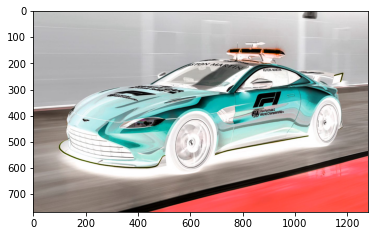

In [23]:
imagem_negativa_banda_y_rgb=[]
imagem_negativa_banda_y_rgb = conversor_banda_y_rgb(coresNegYIQ)

imshow(imagem_negativa_banda_y_rgb)
print("Imagem convertida do negativo da banda Y para RGB")

Imagem RGB negativo convertida anteriormente para comparação


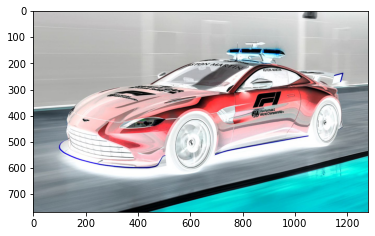

In [24]:
imshow(imagem_negativa)
print("Imagem RGB negativo convertida anteriormente para comparação")

### Questão 3
Correlação m x n sobre R, G e B, com offset, e filtro especificado em um arquivo (txt) a parte. Testar com filtros Média, Prewitt e Emboss e explicar os resultados. Para visualização, utilize valor absoluto seguido por expansão de histograma para [0, 255].


In [25]:
# Leitura do arquivo para o filtro prewitt
file = open("./filtrosQuestao3/prewitt.txt", "r")

linhas = file.readlines()

n_prewitt = int(linhas[0])
m_prewitt = int(linhas[1])
mascara_prewitt_v = []
mascara_prewitt_h = []

linha_atual = 2
for linha in linhas[2:(linha_atual + n_prewitt)]:
    mascara_prewitt_v.append([int(s) for s in linha.split()])
print('Mascara Prewitt vertical', mascara_prewitt_v)

linha_atual += n_prewitt + 1   
  
for linha in linhas[linha_atual:(linha_atual + n_prewitt)]:
    mascara_prewitt_h.append([int(s) for s in linha.split()])
print('Mascara Prewitt horizontal', mascara_prewitt_h)


Mascara Prewitt vertical [[-1, -1, -1], [0, 0, 0], [1, 1, 1]]
Mascara Prewitt horizontal [[1, 0, -1], [1, 0, -1], [1, 0, -1]]


In [26]:
# Leitura do arquivo para o filtro Emboss
file = open("./filtrosQuestao3/emboss.txt", "r")

linhas = file.readlines()

n_emboss = int(linhas[0])
m_emboss = int(linhas[1])
mascara_emboss = []

for linha in linhas[2:(2 + n_emboss)]:
    mascara_emboss.append([int(s) for s in linha.split()])
print('Mascara emboss', mascara_emboss)

Mascara emboss [[-2, -1, 0], [-1, 1, 1], [0, 1, 2]]


#### Função para extensão da imagem

In [27]:
def funcao_extensao(img, n, m):
    extensao = []
    pixel_0 = (0,0,0)
    linhas_extra = int(n/2)   # Linhas extras embaixo e em cima 
    colunas_extra = int(m/2)  # Colunas extras nas laterais
    tam_linhas = len(img)     # Linhas da imagem original
    tam_colunas = len(img[0]) # Colunas da imagem original
    
    #linha(s) iniciais
    for i in range(linhas_extra):    # Para cada linha extra no começo 
        linha = []
        for j in range(tam_colunas + m): # Para cada coluna no geral (anterior + novas)
            linha.append(pixel_0)   
        extensao.append(linha)

    #linhas do meio
    for i in range(tam_linhas):   # Para cada linha da imagem original
        linha = []
        for j in range(colunas_extra): # Para cada coluna extra no inicio na linha
            linha.append(pixel_0)
        for k in range(tam_colunas):  # Para cada coluna na imagem original
            linha.append(img[i][k])   # colocando os pixels originais na linha
        for l in range(colunas_extra): # Para cada coluna extra no fim na linha
            linha.append(pixel_0)
        extensao.append(linha)

    #linha(s) finais
    for i in range(linhas_extra):    # Para cada linha extra no fim 
        linha = []
        for j in range(tam_colunas + m ): #para cada coluna no geral anterior + novas
            linha.append(pixel_0)   
        extensao.append(linha)
    
    return extensao

<h4> <li> Filtro Média

In [28]:
# Função que realiza o filtro média
def filtro_media(n, m, img, offset):

    imgOut = [] # Extensão
    
    linhas_extra = int(n/2)   # linhas extras em cima e embaixo 
    colunas_extra = int(m/2)  # Colunas extras nas laterais
    tam_linhas = len(img)     # linhas original
    tam_colunas = len(img[0]) # Colunas original

    extensao = funcao_extensao(img,n,m)

    # filtro em si
    for i in range(linhas_extra, tam_linhas + linhas_extra):    #para cada linha da imagem original
        linha = []
        for j in range(colunas_extra, tam_colunas + colunas_extra):   #para cada coluna da imagem original
            sum_R, sum_G, sum_B = (0, 0, 0)

            for k in range(i - linhas_extra, i + linhas_extra + 1):   #para cada linha periferica ao pixel original
                for l in range(j - colunas_extra, j + colunas_extra + 1): #para cada coluna periferica ao pixel original
                    sum_R = sum_R + extensao[k][l][0] 
                    sum_G = sum_G + extensao[k][l][1]
                    sum_B = sum_B + extensao[k][l][2]
            sum_R = round(sum_R/(n*m)) + offset
            sum_G = round(sum_G/(n*m)) + offset
            sum_B = round(sum_B/(n*m)) + offset
            
            pixel = (sum_R, sum_G, sum_B)
            linha.append(pixel)
        imgOut.append(linha)

    return imgOut

In [29]:
# Tamanho da mascara
linhas_mascara = 21 # Linhas da máscara
colunas_mascara = 21 # Colunas da máscara
offset = 0

# Chamando a função do filtro média
# imgMedia = filtro_media(linhas_mascara, colunas_mascara, coresRGB_antes, offset) #LEMBRAR DE DESCOMENTAR

In [30]:
# imshow(imgMedia) #LEMBRAR DE DESCOMENTAR

<h4> <li> Filtro Prewitt

In [31]:
def filtro_prewitt(img, n, m, mascara, offset):

    #filtro prewitt
    imgOut = []

    #fazendo extensão
    extensao = funcao_extensao(img,n,m)

    tamLinhas = len(img)
    tamColunas = len(img[0])

    #filtro
    for i in range(1, tamLinhas + 1):
        linha = []
        for j in range(1, tamColunas + 1):
            sum_R, sum_G, sum_B, prewittL = (0, 0, 0, 0)

            for k in range(i - 1, i + 2):
                prewittC = 0
                for l in range(j - 1, j + 2):
                    sum_R += extensao[k][l][0]*mascara[prewittL][prewittC]
                    sum_G += extensao[k][l][1]*mascara[prewittL][prewittC]
                    sum_B += extensao[k][l][2]*mascara[prewittL][prewittC]
                    prewittC += 1
                prewittL += 1
            
            linha.append((sum_R + offset, sum_G + offset, sum_B + offset))
        imgOut.append(linha)

    return imgOut

In [32]:
img_prewitt = []
matriz_RGB(image, img_prewitt)
print()

In [33]:
# Chamando a função do filtro Prewitt vertical

img_prewitt_v = filtro_prewitt(img_prewitt, n_prewitt, m_prewitt, mascara_prewitt_v, offset)

In [34]:
# Chamando a função do filtro Prewitt horizontal

img_prewitt_h = filtro_prewitt(img_prewitt, n_prewitt, m_prewitt, mascara_prewitt_h, offset) 

Filtro prewitt vertical


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


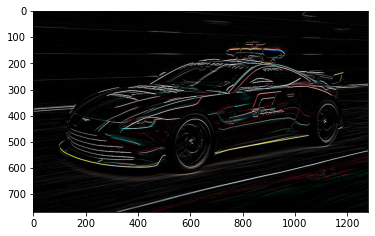

In [35]:
# Prewitt vertical
print("Filtro prewitt vertical")
imshow(img_prewitt_v)

Filtro prewitt horizontal


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


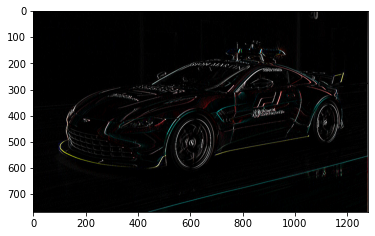

In [36]:
# Prewitt horizontal
print("Filtro prewitt horizontal")
imshow(img_prewitt_h)

<h4><li> Filtro Emboss

In [37]:
def RGB2Gray(r, g, b):
    return (r*0.2126 + g*0.7152 + b*0.0722)

In [38]:
# Função que realiza o filtro emboss
def filtro_emboss(img, n, m, mascara, offset):

    imgOut = [] # Extensão
    
    linhas_extra = int(n/2)   # linhas extras em cima e embaixo 
    colunas_extra = int(m/2)  # Colunas extras nas laterais
    tam_linhas = len(img)     # linhas original
    tam_colunas = len(img[0]) # Colunas original

    extensao = funcao_extensao(img,n,m)

    # filtro em si
    for i in range(linhas_extra, tam_linhas + linhas_extra):    #para cada linha da imagem original
        linha = []
        for j in range(colunas_extra, tam_colunas + colunas_extra):   #para cada coluna da imagem original
            sum_R, sum_G, sum_B, embossL = (0, 0, 0, 0)

            for k in range(i - linhas_extra, i + linhas_extra + 1):   #para cada linha periferica ao pixel original
                embossC = 0
                for l in range(j - colunas_extra, j + colunas_extra + 1): #para cada coluna periferica ao pixel original
                    sum_R += extensao[k][l][0]*mascara[embossL][embossC] 
                    sum_G += extensao[k][l][1]*mascara[embossL][embossC] 
                    sum_B += extensao[k][l][2]*mascara[embossL][embossC] 
                    embossC += 1
                embossL += 1
                
            sum_R += offset
            sum_G += offset
            sum_B += offset
            sum_R, sum_G, sum_B = RGBRound(sum_R, sum_G, sum_B)
            pixel = RGB2Gray(sum_R, sum_G, sum_B)
            
            linha.append(pixel)
        imgOut.append(linha)

    return imgOut

In [39]:
img_emboss = []
matriz_RGB(image, img_emboss)

# Chamando a função do filtro emboss
img_emboss = filtro_emboss(img_emboss, n_emboss, m_emboss, mascara_emboss, offset)

Filtro Emboss


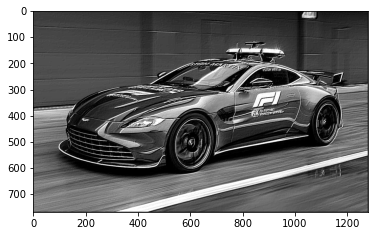

In [40]:
print("Filtro Emboss")
imshow(img_emboss, cmap='gray')

In [41]:
# img_emboss_90 = []
# matriz_RGB(image, img_emboss_90)

# # Chamando a função do filtro emboss
# img_emboss_90 = filtro_emboss(img_emboss_90, mascara_emboss_90, offset)

# # Convert the pixels into an array using numpy
# array = np.array(img_emboss_90, dtype=np.uint8)

# # Use PIL to create an image from the new array of pixels
# image_emboss_90 = Image.fromarray(array)
# # image_emboss_90.save('img_emboss_90.jpg')
# imshow(image_emboss_90, cmap='gray')

In [42]:
# img_emboss_135 = []
# matriz_RGB(image, img_emboss_135)

# # Chamando a função do filtro emboss
# img_emboss_135 = filtro_emboss(img_emboss_135, mascara_emboss_135, offset)

# # Convert the pixels into an array using numpy
# array = np.array(img_emboss_135, dtype=np.uint8)

# # Use PIL to create an image from the new array of pixels
# img_emboss_135 = Image.fromarray(array)
# imshow(img_emboss_135, cmap='gray')

# # img_emboss_135.save('img_emboss_135.jpg')

In [43]:
import math
import matplotlib.pyplot as plt

def instantiate_histogram():    
    hist_array= []
    
    for i in range(0,256):
        hist_array.append(str(i))
        hist_array.append(0)
    
    hist_dct = {hist_array[i]: hist_array[i + 1] for i in range(0, len(hist_array), 2)} 
    
    return hist_dct

In [44]:
histogram = instantiate_histogram()

In [45]:
def count_intensity_values(hist, img):
    for row in img:
        for column in row:
            hist[str(int(column))] = hist[str(int(column))] + 1
     
    return hist
histogram = count_intensity_values(histogram, img_emboss)

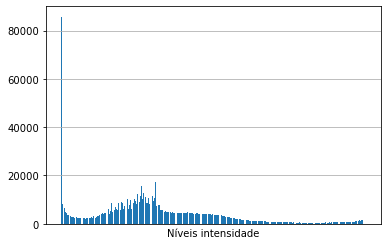

In [46]:
def plot_hist(hist, hist2=''):
    if hist2 != '':
        figure, axarr = plt.subplots(1,2, figsize=(20, 10))
        axarr[0].bar(hist.keys(), hist.values())
        axarr[1].bar(hist2.keys(), hist2.values())
    else:
        plt.bar(hist.keys(), hist.values())
        plt.xlabel("Níveis intensidade")
        ax = plt.gca()
        ax.axes.xaxis.set_ticks([])
        plt.grid(True)
        plt.show()
    
plot_hist(histogram)

In [48]:
# def get_hist_proba(hist, n_pixels):
#     hist_proba = {}
#     for i in range(0, 256):
#         hist_proba[str(i)] = hist[str(i)] / n_pixels
    
#     return hist_proba
# n_pixels = image.shape[0] * image.shape[1]
# hist_proba = get_hist_proba(histogram, n_pixels)

### Questão 4
Compare a aplicação do filtro média 21x21 com a aplicação do filtro média 21x1
seguido pela aplicação do filtro média 1x21, em termos de tempo de processamento e resultado final, para a banda Y do YIQ.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


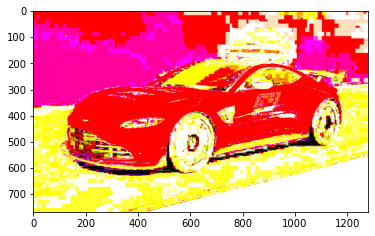

In [49]:
import time

# Imagem original convertida YIQ na banda Y previamente convertida
imshow(coresYIQ_banda_y)

In [ ]:
# Aplicação do filtro média 21x21
offset = 0
inicio = time.process_time()
img_media_banda_y_1 = filtro_media(21, 21, coresYIQ_banda_y, offset)
final = time.process_time()

duracao_1 = final - inicio

In [ ]:
imshow(img_media_banda_y_1)
print("Tempo de processamento 21x21 com imagem na banda Y: ", duracao_1)

In [ ]:
# Aplicação do filtro média 21x1
inicio = time.process_time()
img_media_banda_y = filtro_media(21, 1, coresYIQ_banda_y, offset)
img_media_banda_y_2 = filtro_media(1, 21, img_media_banda_y, offset)
final = time.process_time()

duracao_2 = final - inicio

In [ ]:
imshow(img_media_banda_y_2)
print("Tempo de processamento 21x1 seguido de 1x21 com imagem na banda Y: ", duracao_2)

### Questão 5
Filtro mediana m x n sobre a banda Y do YIQ.

In [ ]:
# Imagem original convertida YIQ na banda Y previamente convertida
imshow(coresYIQ_banda_y)

In [ ]:
def filtro_mediana(n, m, img):
    
    # Fazendo extensão
    imgOut = []
    extensao = funcao_extensao(img,n,m)
    
    linhas_extra = int(n/2)
    colunas_extra = int(m/2)
    tam_linhas = len(img)
    tam_colunas = len(img[0])

    #filtro
    for i in range(linhas_extra, tam_linhas + linhas_extra):    # Para cada linha da imagem original
        linha = []
        for j in range(colunas_extra, tam_colunas + colunas_extra):   # Para cada coluna da imagem original
            R = []
            G = []
            B = []
            for k in range(i - linhas_extra, i + linhas_extra + 1):   # Para cada linha periferica ao pixel original
                for l in range(j - colunas_extra, j + colunas_extra + 1): # Para cada coluna periferica ao pixel original
                    R.append(extensao[k][l][0])
                    G.append(extensao[k][l][1]) 
                    B.append(extensao[k][l][2])
            R.sort()
            G.sort()
            B.sort()
            if((len(R)%2)==0):
                medianaR = (R[(len(R)/2)-1]+ R[len(R)/2])/2
                medianaG = (G[(len(G)/2)-1]+ G[len(G)/2])/2
                medianaB = (B[(len(B)/2)-1]+ B[len(B)/2])/2
            else:
                medianaR = R[(int(len(R)/2))]
                medianaG = G[(int(len(G)/2))]
                medianaB = B[(int(len(B)/2))]
                    
            linha.append((medianaR, medianaG, medianaB))
        imgOut.append(linha)

    return imgOut

In [ ]:
img_mediana=[]
img_mediana = filtro_mediana(21,21, coresYIQ_banda_y)

In [ ]:
# Imagem na banda Y com filtro mediana
imshow(img_mediana)

### Questão 6
Reproduza o exemplo em https://la.mathworks.com/help/images/ref/normxcorr2.html?lang=en, com as
imagens woman.png e woman_eye.png, mas aplicando a correlação normalizada
banda a banda e tomando como resultado o valor máximo das três correlações, em
cada ponto. Você pode utilizar toda a funcionalidade da linguagem de programação
de sua escolha, incluindo bibliotecas avançadas. Para visualização, utilize valor
absoluto seguido por expansão de histograma para [0, 255].

In [ ]:
from scipy import signal
from scipy import misc
# import cv2 as cv
import numpy as np
# from matplotlib import pyplot as plt

template = cv.imread("./imagens_teste/woman_eye.png")
woman = cv.imread("./imagens_teste/woman.png")

template = cv.cvtColor(template, cv.COLOR_BGR2RGB)
woman = cv.cvtColor(woman, cv.COLOR_BGR2RGB)

In [ ]:
figure = plt.figure()

figure.add_subplot(1,2, 1)
plt.subplot(121),plt.imshow(woman)
plt.title('Imagem base'), plt.xticks([]), plt.yticks([])

figure.add_subplot(1,2, 2)
plt.subplot(122),plt.imshow(template)
plt.title('Template'), plt.xticks([]), plt.yticks([])

plt.show(block=True)

In [ ]:
height, width = template.shape[:2]

method = eval('cv.TM_CCORR_NORMED')

# Aplicando matchTemplate
res = cv.matchTemplate(woman, template, method)

min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
top_left = max_loc
bottom_right = (top_left[0] + width, top_left[1] + height)

coeffs = np.array([0.2126, 0.7152, 0.0722])
woman_final = (woman.astype(float) * coeffs).sum(axis=-1)
woman_final = woman_final.astype(woman.dtype)

cv.rectangle(woman,top_left, bottom_right, 255, 2)
plt.subplot(121),plt.imshow(res,cmap = 'gray')
plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(woman,cmap = 'gray')
plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
plt.suptitle('Correlação normalizada')
plt.show()

In [ ]:

# # Python program to illustrate
# # template matching
# import cv2
# import numpy as np
 
# # Read the main image
# img_rgb = cv2.imread('./imagens_teste/woman_eye.png')
 
# # Convert it to grayscale
# img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
 
# # Read the template
# template = cv2.imread('./imagens_teste/woman_eye.png',0)
 
# # Store width and height of template in w and h
# w, h = template.shape[::-1]
 
# # Perform match operations.
# res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
 
# # Specify a threshold
# threshold = 0.8
 
# # Store the coordinates of matched area in a numpy array
# loc = np.where( res >= threshold)
 
# # Draw a rectangle around the matched region.
# for pt in zip(*loc[::-1]):
#     cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,255,255), 2)
 
# # Show the final image with the matched area.
# cv2.imshow('Detected',img_rgb)